<a href="https://colab.research.google.com/github/AnhTuan1807/Bai-Tap-Tren-Lop/blob/main/AI_20_9_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import skfuzzy as fuzz
x = np.arange(11)
mfx = fuzz.trimf (x,[0,5,10])
x
mfx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

In [3]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 30.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=378045ce3b1f4500fa9a9e20e3d8d2786bc3b0a26735c0b45e251ffa1a487903
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


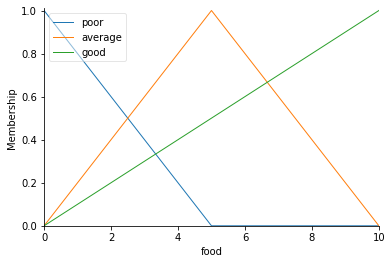

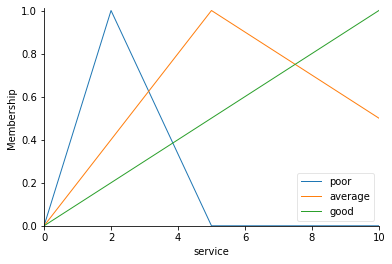

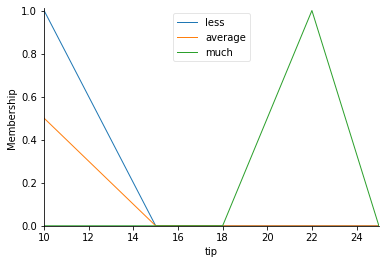

In [18]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),"food")
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,26,1),'tip')

food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[0,10,10])

service['poor']=fuzz.trimf(service.universe,[0,2,5])
service['average']=fuzz.trimf(service.universe,[0,5,15])
service['good']=fuzz.trimf(service.universe,[0,10,15])

tip['less']=fuzz.trimf(tip.universe,[0,10,15])
tip['average']=fuzz.trimf(tip.universe,[0,5,15])
tip['much']=fuzz.trimf(tip.universe,[18,22,25])

food.view()
service.view()
tip.view()




18.275193798449614


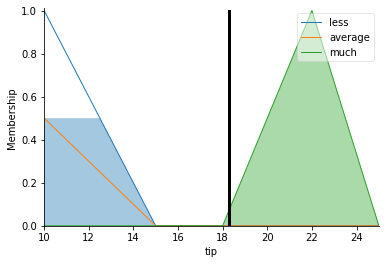

In [19]:
rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['average']& service['average'], tip['average'])
rule3 = ctrl.Rule(food['good']& service['good'], tip['much'])
rule4 = ctrl.Rule(food['poor']& service['average'], tip['less'])
rule5 = ctrl.Rule(food['poor']& service['good'], tip['less'])
rule6 = ctrl.Rule(food['average']& service['average'], tip['less'])
rule7 = ctrl.Rule(food['average']& service['average'], tip['much'])
rule8 = ctrl.Rule(food['good']& service['average'], tip['less'])
rule9 = ctrl.Rule(food['good']& service['average'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=12
tipping.input['service']=10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)


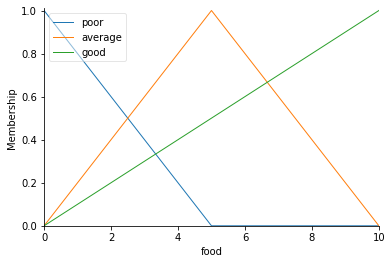

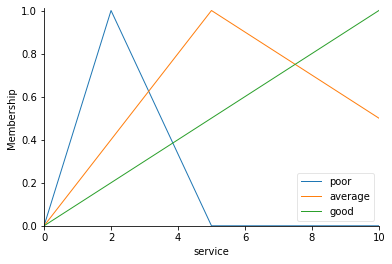

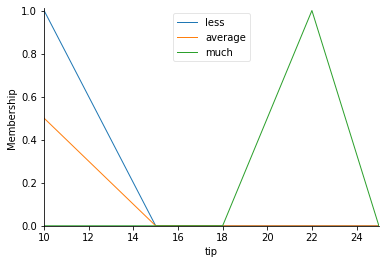

In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(0,11,1),"time")
rice = ctrl.Antecedent(np.arange(0,11,1),"rice")
power = ctrl.Consequent(np.arange(10,26,1),"power")

time['slow'] = fuzz.trimf(time.universe,[0,5,10])
time['average'] = fuzz.trimf(food.universe,[0,5,15])
time['fast'] = fuzz.trimf(food.universe,[0,10,12])

rice['slow'] = fuzz.trimf(service.universe,[0,1,5])
rice['average'] = fuzz.trimf(service.universe,[0,2,5])
rice['fast'] = fuzz.trimf(service.universe,[0,10,13])

power['slow'] = fuzz.trimf(tip.universe,[0,10,15])
power['average'] = fuzz.trimf(tip.universe,[12,14,17])
power['fast'] = fuzz.trimf(tip.universe,[18,22,25])

food.view()
service.view()
tip.view()

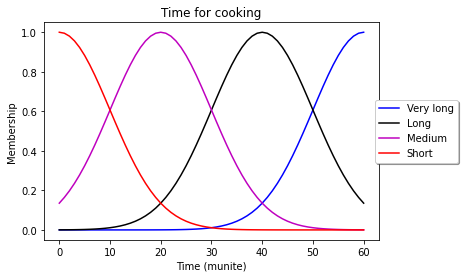

In [21]:
#BTVN NOI COM DIEN
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

%matplotlib inline

time = ctrl.Antecedent(np.arange(0,61,1),'time')
rice = ctrl.Antecedent(np.arange(0.1,1,0.1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

very_long=fuzz.gaussmf(time.universe,60,10)
long=fuzz.gaussmf(time.universe,40,10)
medium=fuzz.gaussmf(time.universe,20,10)
short=fuzz.gaussmf(time.universe,0,10)

much=fuzz.gaussmf(rice.universe,1,0.2)
medium_r=fuzz.gaussmf(rice.universe,0.5,0.2)
less=fuzz.gaussmf(rice.universe,0,10.2)

h_low=fuzz.gaussmf(power.universe,100,10)
h_medium=fuzz.gaussmf(power.universe,75,10)
h_high=fuzz.gaussmf(power.universe,50,10)
h_very_high=fuzz.gaussmf(power.universe,0,10)

plt.plot(time.universe,very_long,'b',linewidth=1.5, label='Very long')
plt.plot(time.universe,long,'k',linewidth=1.5, label='Long')
plt.plot(time.universe,medium,'m',linewidth=1.5, label='Medium')
plt.plot(time.universe,short,'r',linewidth=1.5, label='Short')
plt.title('Time for cooking')
plt.ylabel('Membership')
plt.xlabel('Time (munite)')
plt.legend(loc='center right',bbox_to_anchor=(1.25,0.5),ncol=1,fancybox=True, shadow=True)